# Absenteeism_at_work

## Cho dữ liệu Absenteeism_at_work trong tập tin Absenteeism_at_work.csv
## Yêu cầu: Hãy đọc dữ liệu từ tập tin này, áp dụng Random Forest để thực hiện việc xác định thời gian vắng mặt theo giờ (Absenteeism time in hours (target)) dựa trên các thông tin được cung cấp.
### Chi tiết:
1. Đọc dữ liệu. Chuẩn hóa dữ liệu
2. Tạo X_train, X_test, y_train, y_test từ dữ liệu chuẩn hóa với tỷ lệ dữ liệu test là 0.3
3. Áp dụng Random Forest, Tìm kết quả
4. Kiểm tra độ chính xác
5. Tìm các thuộc tính quan trọng nhất trong tập dữ liệu
6. Trực quan hóa thuộc tính quan trọng
7. Áp dụng lại Random Forest dựa trên các thuộc tính quan trọng, tìm kết quả
8. Kiểm tra độ chính xác
9. Tự cho 1 dữ liệu X_test mới. Ví dụ như: ['Reason for absence', 'Work load Average per day','Age','Month of absence', 'Day of the week', 'Hit target','Transportation expense', 'Weight', 'Seasons', 'Height','Distance from Residence to Work', 'Son', 'Pet', 'Service time'] ứng với [ 10., 205.917, 28.,8., 4., 92., 330. , 84., 1., 182., 16., 0., 0., 4.]. Tìm kết quả Y test.

### Attribute Information:
1. Individual identification (ID)
2. Reason for absence (ICD). Absences attested by the International Code of Diseases (ICD) stratified into 21 categories (I to XXI) as follows:
3. I Certain infectious and parasitic diseases
4. II Neoplasms
5. III Diseases of the blood and blood-forming organs and certain disorders involving the immune mechanism
6. IV Endocrine, nutritional and metabolic diseases
7. V Mental and behavioural disorders
8. VI Diseases of the nervous system
9. VII Diseases of the eye and adnexa
10. VIII Diseases of the ear and mastoid process
11. IX Diseases of the circulatory system
12. X Diseases of the respiratory system
13. XI Diseases of the digestive system
14. XII Diseases of the skin and subcutaneous tissue
15. XIII Diseases of the musculoskeletal system and connective tissue
16. XIV Diseases of the genitourinary system
17. XV Pregnancy, childbirth and the puerperium
18. XVI Certain conditions originating in the perinatal period
19. XVII Congenital malformations, deformations and chromosomal abnormalities
20. XVIII Symptoms, signs and abnormal clinical and laboratory findings, not elsewhere classified
21. XIX Injury, poisoning and certain other consequences of external causes
22. XX External causes of morbidity and mortality
23. XXI Factors influencing health status and contact with health services.

And 7 categories without (CID) patient follow-up (22), medical consultation (23), blood donation
(24), laboratory examination (25), unjustified absence (26), physiotherapy (27), dental consultation
(28).

3. Month of absence
4. Day of the week (Monday (2), Tuesday (3), Wednesday (4), Thursday (5), Friday (6))
5. Seasons (summer (1), autumn (2), winter (3), spring (4))
6. Transportation expense
7. Distance from Residence to Work (kilometers)
8. Service time
9. Age
10. Work load Average/day
11. Hit target
12. Disciplinary failure (yes=1; no=0)
13. Education (high school (1), graduate (2), postgraduate (3), master and doctor (4))
14. Son (number of children)
15. Social drinker (yes=1; no=0)
16. Social smoker (yes=1; no=0)
17. Pet (number of pet)
18. Weight
19. Height
20. Body mass index
21. Absenteeism time in hours (target)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_squared_error, roc_auc_score, roc_curve


In [2]:
data = pd.read_csv("../../Data/Absenteeism_at_work.csv", sep=";")

In [3]:
type(data)

pandas.core.frame.DataFrame

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ID                               740 non-null    int64  
 1   Reason for absence               740 non-null    int64  
 2   Month of absence                 740 non-null    int64  
 3   Day of the week                  740 non-null    int64  
 4   Seasons                          740 non-null    int64  
 5   Transportation expense           740 non-null    int64  
 6   Distance from Residence to Work  740 non-null    int64  
 7   Service time                     740 non-null    int64  
 8   Age                              740 non-null    int64  
 9   Work load Average per day        740 non-null    float64
 10  Hit target                       740 non-null    int64  
 11  Disciplinary failure             740 non-null    int64  
 12  Education             

In [5]:
data.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average per day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239.554,...,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239.554,...,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239.554,...,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,2


In [6]:
data.tail()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average per day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
735,11,14,7,3,1,289,36,13,33,264.604,...,0,1,2,1,0,1,90,172,30,8
736,1,11,7,3,1,235,11,14,37,264.604,...,0,3,1,0,0,1,88,172,29,4
737,4,0,0,3,1,118,14,13,40,271.219,...,0,1,1,1,0,8,98,170,34,0
738,8,0,0,4,2,231,35,14,39,271.219,...,0,1,2,1,0,2,100,170,35,0
739,35,0,0,6,3,179,45,14,53,271.219,...,0,1,1,0,0,1,77,175,25,0


In [7]:
X = data.iloc[:, 1:-1]
y = data.iloc[:,-1]

In [8]:
X.head()

,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average per day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index
0,26,7,3,1,289,36,13,33,239.554,97,0,1,2,1,0,1,90,172,30
1,0,7,3,1,118,13,18,50,239.554,97,1,1,1,1,0,0,98,178,31
2,23,7,4,1,179,51,18,38,239.554,97,0,1,0,1,0,0,89,170,31
3,7,7,5,1,279,5,14,39,239.554,97,0,1,2,1,1,0,68,168,24
4,23,7,5,1,289,36,13,33,239.554,97,0,1,2,1,0,1,90,172,30


In [9]:
y.head()

0    4
1    0
2    2
3    4
4    2
Name: Absenteeism time in hours, dtype: int64

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 1)

In [11]:
clf = RandomForestRegressor(n_estimators=250)

In [12]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

In [13]:
type(y_test)

pandas.core.series.Series

In [14]:
type(y_pred)

numpy.ndarray

In [15]:
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))

Mean Squared Error: 136.96625137711715


In [16]:
# Evaluation
print("The R^2: ",clf.score(X,y)*100,"%")
print("The Training R^2 is: ",clf.score(X_train,y_train)*100,"%")
print("The Testing R^2 is: ",clf.score(X_test,y_test)*100,"%")

The R^2:  65.76878168600521 %
The Training R^2 is:  84.23930800854873 %
The Testing R^2 is:  22.04028612291362 %


# => The Training R^2 >> Testing R^2 => Overfitting => Solution???

In [17]:
# Finding Important Features in Scikit-learn
feature_imp = pd.Series(clf.feature_importances_,
index = np.array(X.columns)).sort_values(ascending=False)
feature_imp

Reason for absence                 0.227694
Work load Average per day          0.163335
Age                                0.103754
Month of absence                   0.074008
Day of the week                    0.072122
Hit target                         0.059314
Transportation expense             0.047420
Seasons                            0.040821
Height                             0.035405
Son                                0.034412
Weight                             0.033581
Distance from Residence to Work    0.029813
Body mass index                    0.020056
Service time                       0.019140
Pet                                0.017549
Social drinker                     0.013403
Disciplinary failure               0.003439
Social smoker                      0.002939
Education                          0.001797
dtype: float64

In [18]:
type(feature_imp)

pandas.core.series.Series

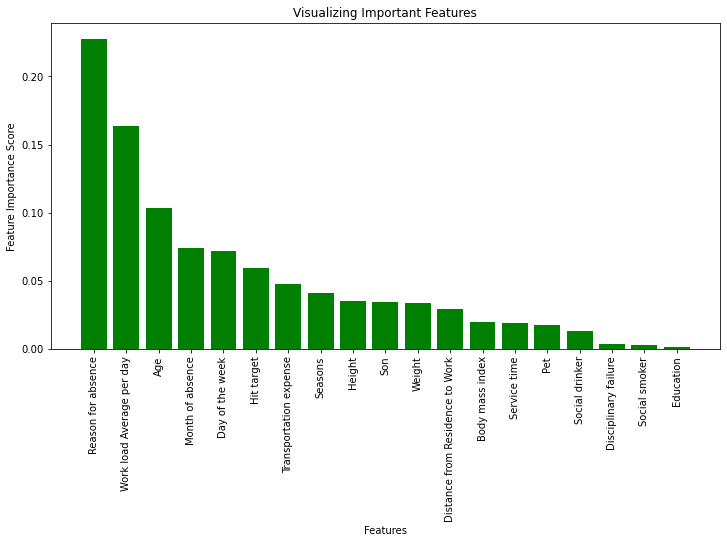

In [19]:
# Creating a bar plot
plt.figure(figsize=(12,6))
plt.bar(feature_imp.index, feature_imp, color="g")
# Add labels to your graph
plt.xlabel('Features')
plt.ylabel('Feature Importance Score')
plt.title("Visualizing Important Features")
plt.xticks(rotation = "vertical")
plt.show()

In [20]:
feature_imp[feature_imp >0.05].sum()

0.7002277385488331

In [21]:
feature_imp_select = feature_imp[feature_imp >0.05]
feature_imp_select

Reason for absence           0.227694
Work load Average per day    0.163335
Age                          0.103754
Month of absence             0.074008
Day of the week              0.072122
Hit target                   0.059314
dtype: float64

In [22]:
feature_imp_select.index

Index(['Reason for absence', 'Work load Average per day', 'Age',
       'Month of absence', 'Day of the week', 'Hit target'],
      dtype='object')

In [23]:
# Tạo lại dữ liệu huấn luyện và test sau khi bỏ đi các thuộc tính ít quan trọng h
# Split dataset into features and labels
X1 = data[feature_imp_select.index]
y1 = data['Absenteeism time in hours']

In [24]:
# Split dataset into training set and test set
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.3, random_state = 1)

In [25]:
clf1 = RandomForestRegressor(n_estimators=100)
clf1.fit(X1_train,y1_train)
y1_pred = clf1.predict(X1_test)

In [26]:
print("Mean Squared Error:", mean_squared_error(y1_test, y1_pred))

Mean Squared Error: 145.52942555607635


In [27]:
# Evaluation
print("The R^2: ",clf1.score(X1,y1)*100,"%")
print("The Training R^2: ",clf1.score(X1_train,y1_train)*100,"%")
print("The Testing R^2: ",clf1.score(X1_test,y1_test)*100,"%")

The R^2:  63.435235930035546 %
The Training R^2:  82.97881472253543 %
The Testing R^2:  17.166219685677063 %


# => The Training R^2 >> Testing R^2 => Overfitting => Solution???

In [28]:
a = X1.iloc[20]
X_new = a.values

In [29]:
clf1.predict([X_new])

array([22.72])